In [46]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## Data Preperation

In [7]:
import os
os.environ['eda'] = "False"

In [8]:
df = pd.read_csv("/content/second-hand-car.csv")

In [9]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [10]:
print(df.columns)

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')


In [11]:
df.shape

(1000, 12)

In [12]:
if os.environ['eda'] == "True":
  sns.pairplot(df[['on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [13]:
tensor_data = tf.constant(df)
print(tensor_data.shape)

(1000, 12)


In [14]:
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [15]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[6.890000e+02 6.238250e+05 7.293350e+05 2.000000e+00 5.652300e+04
  5.000000e+00 6.000000e+00 1.200000e+01 1.550000e+02 5.700000e+01
  1.080000e+02 4.561545e+05]
 [7.770000e+02 6.934950e+05 8.303220e+05 6.000000e+00 7.757000e+04
  5.000000e+00 3.000000e+00 9.000000e+00 1.820000e+02 1.090000e+02
  7.900000e+01 4.496500e+05]
 [8.730000e+02 6.921570e+05 8.249260e+05 7.000000e+00 1.429590e+05
  2.000000e+00 4.000000e+00 9.000000e+00 1.980000e+02 1.160000e+02
  9.900000e+01 1.790770e+05]
 [5.410000e+02 5.222020e+05 8.281700e+05 3.000000e+00 9.672300e+04
  4.000000e+00 2.000000e+00 1.100000e+01 1.430000e+02 1.140000e+02
  7.300000e+01 2.889260e+05]
 [9.550000e+02 5.065040e+05 7.004280e+05 4.000000e+00 1.059050e+05
  3.000000e+00 1.000000e+00 1.300000e+01 1.600000e+02 5.200000e+01
  1.300000e+02 1.797115e+05]], shape=(5, 12), dtype=float64)


In [16]:
X = tensor_data[:, 3:-1]
print(X.shape)

(1000, 8)


In [17]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)
print(y.shape)

(1000, 1)


In [56]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [70]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [71]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [72]:
X_test = X[int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO)):int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO+TEST_RATIO))]
y_test = y[int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO)):int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO+TEST_RATIO))]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [73]:
normalizer = Normalization()
normalizer.adapt(X_train) # adapts the mean and variance
normalizer(X_train)
print(X_train[:5, :])

tf.Tensor(
[[2.00000e+00 5.65230e+04 5.00000e+00 6.00000e+00 1.20000e+01 1.55000e+02
  5.70000e+01 1.08000e+02]
 [6.00000e+00 7.75700e+04 5.00000e+00 3.00000e+00 9.00000e+00 1.82000e+02
  1.09000e+02 7.90000e+01]
 [7.00000e+00 1.42959e+05 2.00000e+00 4.00000e+00 9.00000e+00 1.98000e+02
  1.16000e+02 9.90000e+01]
 [3.00000e+00 9.67230e+04 4.00000e+00 2.00000e+00 1.10000e+01 1.43000e+02
  1.14000e+02 7.30000e+01]
 [4.00000e+00 1.05905e+05 3.00000e+00 1.00000e+00 1.30000e+01 1.60000e+02
  5.20000e+01 1.30000e+02]], shape=(5, 8), dtype=float64)


- Sequential API
- Functional API
- Subclass

## Neural Network

In [74]:
model = tf.keras.Sequential([
     InputLayer(input_shape = (8,), batch_size=10),
     normalizer,
     Dense(1),
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (10, 8)                   17        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (10, 1)                   9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________
None


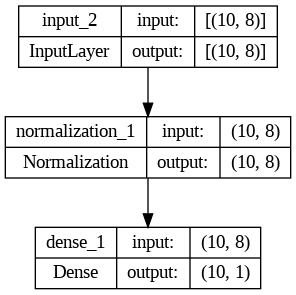

In [75]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

### Alternative Method for constructing Neural Network

In [21]:
"""
model = tf.keras.Sequential()

model.add(normalizer)
model.add(Dense(1)) # Dense (1) will give one output, Dense (n) will give n outputs
print(model.summary())
"""

'\nmodel = tf.keras.Sequential()\n\nmodel.add(normalizer)\nmodel.add(Dense(1)) # Dense (1) will give one output, Dense (n) will give n outputs\nprint(model.summary())\n'

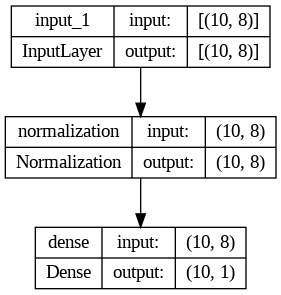

In [22]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## Training & Compiling it

In [76]:
model.compile(loss= MeanAbsoluteError(), optimizer = Adam(learning_rate=1), metrics= RootMeanSquaredError())

In [77]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 309591.1562 - root_mean_squared_error: 334048.2188 - val_loss: 296759.1562 - val_root_mean_squared_error: 323257.6562
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 309565.5000 - root_mean_squared_error: 334024.6875 - val_loss: 296734.0938 - val_root_mean_squared_error: 323234.8750
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 309540.6250 - root_mean_squared_error: 334001.6875 - val_loss: 296709.0938 - val_root_mean_squared_error: 323211.7812
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 309515.8750 - root_mean_squared_error: 333978.3750 - val_loss: 296684.5938 - val_root_mean_squared_error: 323188.9688
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 309490.6250 - root_mean_squared_error: 333955.0625 - val_loss: 296659.1250 - val_root_mean_squared_error: 323166.2812
Epoch 6/100
25/25 [==========================

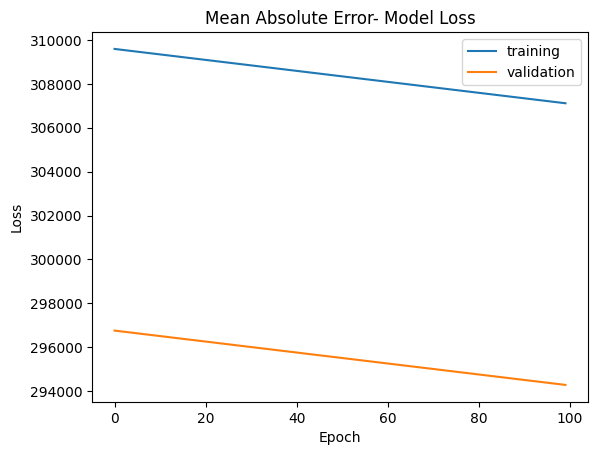

In [78]:
import matplotlib.pyplot as plt

# Assuming `history` is the variable containing the history object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Absolute Error- Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

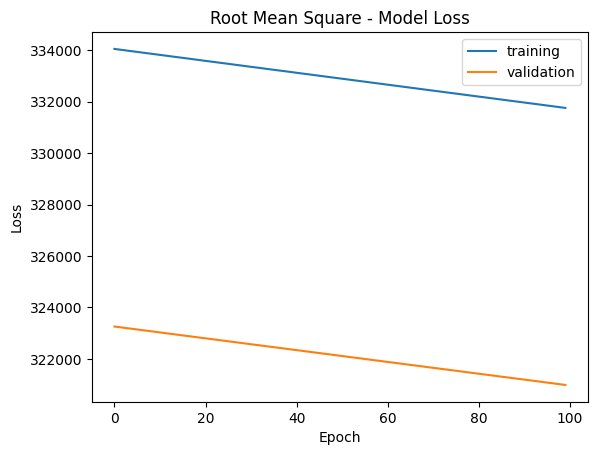

In [79]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root Mean Square - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'] ,loc='upper right')
plt.show()

In [80]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 309099.6250 - root_mean_squared_error: 334382.9375


[309099.625, 334382.9375]

## Predicting

In [85]:
model.predict(X_test[0])

1/1 [==============================] - 0s 81ms/step


array([[2496.65]], dtype=float32)

In [86]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([360410.])>